In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import json

In [45]:
# training_data = {'params.json': [], "progress.csv": []}
df_list = []
for root, dirs, files in os.walk('/Users/alexanderkell/Documents/PhD/Projects/18-battery-optimisation/data/models'):
    for name in files:
        file = "{}/{}".format(root,name)     
        if name.endswith(("csv")):
            d = pd.read_csv(file)
            d['battery_size'] = root.split("battery_size=")[1].split(",lr=")[0]
            d['lr'] = root.split(",lr=")[1].split("_")[0]
#             training_data['progress.csv'].append(d)
            df_list.append(d)
training = pd.concat(df_list)
training.head()

,episode_reward_max,episode_reward_min,episode_reward_mean,episode_len_mean,episodes_this_iter,num_healthy_workers,timesteps_total,done,episodes_total,training_iteration,...,info/num_steps_trained,info/last_target_update_ts,info/num_target_updates,perf/cpu_util_percent,perf/ram_util_percent,info/learner/default_policy/mean_q,info/learner/default_policy/max_q,info/learner/default_policy/min_q,battery_size,lr
0,-88.563772,-88.563772,-88.563772,2352.0,1,1,2500,False,1,1,...,256256,2500,1001,63.940833,64.483333,-0.318351,-0.186366,-0.575112,1.4,0.01
1,-15.194133,-88.563772,-51.878953,2352.0,1,1,5000,False,2,2,...,896256,5000,3501,67.917114,63.121477,-0.327748,-0.196802,-0.612551,1.4,0.01
2,-12.577837,-88.563772,-38.778581,2352.0,1,1,7500,False,3,3,...,1536256,7500,6001,72.729870,61.230844,-0.296034,-0.191774,-0.634858,1.4,0.01
3,-11.458300,-88.563772,-31.948511,2352.0,1,1,10000,False,4,4,...,2176256,10000,8501,78.530124,60.159938,-0.299605,-0.174796,-0.673781,1.4,0.01
4,-11.458300,-88.563772,-27.992861,2352.0,1,1,12500,False,5,5,...,2816256,12500,11001,80.387240,59.165282,-0.274187,-0.142524,-0.721746,1.4,0.01


In [62]:
training['battery_size'] = pd.to_numeric(training['battery_size'])
training.to_csv("/Users/alexanderkell/Documents/PhD/Projects/18-battery-optimisation/data/results/training/training_results.csv")

Text(0, 0.5, 'Mean episode reward')

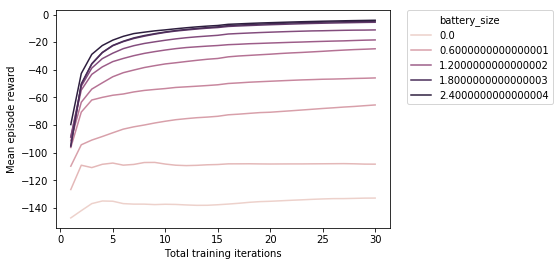

In [60]:
sns.lineplot(data=training, x="training_iteration", y='episode_reward_mean', hue="battery_size")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Total training iterations")
plt.ylabel("Mean episode reward")